# Data Wrangling: Clean, Transform, Merge, Reshape

## Combining and Merging Datasets

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [2]:
# The default merge is an 'inner' join

In [3]:
left = {'long':['aaaa', 'bbbb'], 
                      'X':['a', 'b']}      

In [4]:
left = pd.DataFrame(left, columns=['long', 'X'])

In [5]:
left

,long,X
0,aaaa,a
1,bbbb,b


In [6]:
right = {'Y':['b', 'c'], 
         'short':['bb', 'cc']}

In [7]:
right = pd.DataFrame(right, columns=['Y', 'short'])

In [8]:
right

,Y,short
0,b,bb
1,c,cc


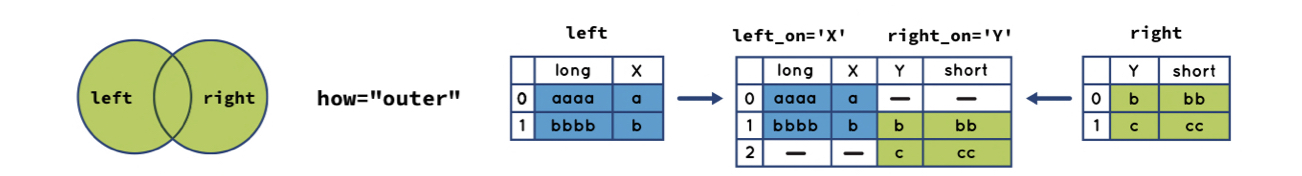

In [9]:
pd.merge(left, right, how='outer', left_on='X', right_on='Y')

,long,X,Y,short
0,aaaa,a,NaN,NaN
1,bbbb,b,b,bb
2,NaN,NaN,c,cc


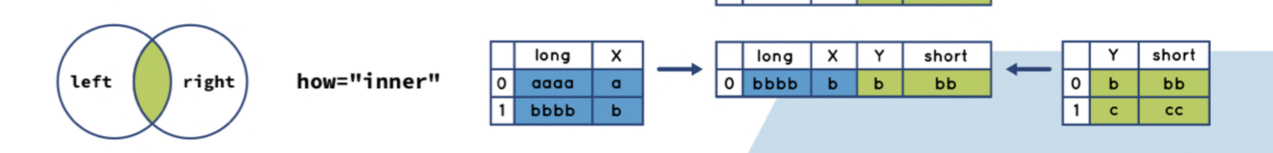

In [10]:
pd.merge(left, right, how='inner', left_on='X', right_on='Y')

,long,X,Y,short
0,bbbb,b,b,bb


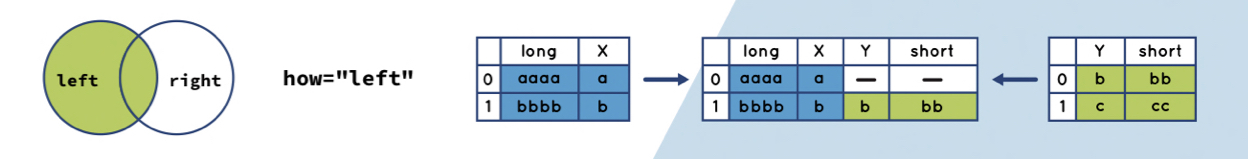

In [11]:
pd.merge(left, right, how='left', left_on='X', right_on='Y')

,long,X,Y,short
0,aaaa,a,NaN,NaN
1,bbbb,b,b,bb


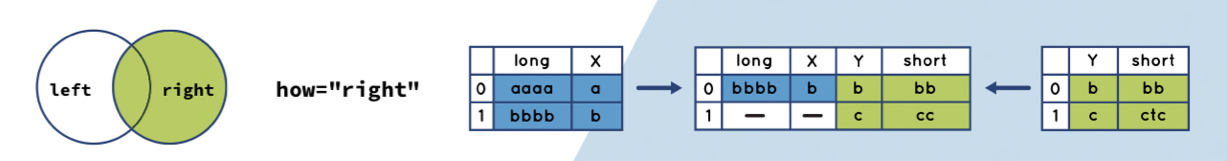

In [12]:
pd.merge(left, right, how='right', left_on='X', right_on='Y')

,long,X,Y,short
0,bbbb,b,b,bb
1,NaN,NaN,c,cc


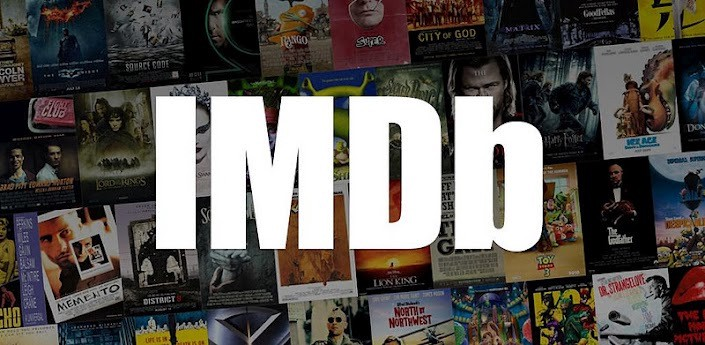

In [13]:
movies_titles = pd.read_csv('movies_titles.csv')

In [14]:
movies_informations = pd.read_csv('movies_informations.csv')

In [15]:
movies_casts = pd.read_csv('movies_casts.csv')

In [16]:
movies_titles.head()

,title
0,The Shawshank Redemption
1,The Dark Knight
2,Inception
3,Fight Club
4,Pulp Fiction


In [17]:
movies_informations.head()

,runtime,genre,rating,about,votes,gross_earn
0,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,"26,26,905",$28.34M
1,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,"25,98,173",$534.86M
2,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,"23,04,062",$292.58M
3,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,"20,71,088",$37.03M
4,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...","20,11,013",$107.93M


In [18]:
movies_casts.head()

,director,stars
0,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G..."
1,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro..."
2,Christopher Nolan,"('Leonardo DiCaprio',), ('Joseph Gordon-Levitt..."
3,David Fincher,"('Brad Pitt',), ('Edward Norton',), ('Meat Loa..."
4,Quentin Tarantino,"('John Travolta',), ('Uma Thurman',), ('Samuel..."


In [19]:
Movies = pd.merge(movies_titles, movies_informations, left_index=True, right_index=True)

In [20]:
Movies

,title,runtime,genre,rating,about,votes,gross_earn
0,The Shawshank Redemption,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,"26,26,905",$28.34M
1,The Dark Knight,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,"25,98,173",$534.86M
2,Inception,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,"23,04,062",$292.58M
3,Fight Club,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,"20,71,088",$37.03M
4,Pulp Fiction,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...","20,11,013",$107.93M
...,...,...,...,...,...,...,...
4995,Seven Brides for Seven Brothers,102 min,"Comedy, Drama, Musical",7.3,"In 1850 Oregon, when a backwoodsman brings a w...","25,112",$9.40M
4996,Playing It Cool,94 min,"Comedy, Romance",5.9,Unrequited love motivates a guy to write about...,"28,515",NaN
4997,A Moment to Remember,"Drama, Romance",NaN,8.1,A young couple's enduring love is tested when ...,"23,957",NaN
4998,Hairspray,92 min,"Comedy, Drama, Family",7.0,A 'pleasantly plump' teenager teaches 1962 Bal...,"21,536",$6.67M


In [21]:
Movies = pd.merge(Movies, movies_casts, left_index=True, right_index=True)

In [22]:
Movies

,title,runtime,genre,rating,about,votes,gross_earn,director,stars
0,The Shawshank Redemption,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,"26,26,905",$28.34M,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G..."
1,The Dark Knight,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,"25,98,173",$534.86M,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro..."
2,Inception,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,"23,04,062",$292.58M,Christopher Nolan,"('Leonardo DiCaprio',), ('Joseph Gordon-Levitt..."
3,Fight Club,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,"20,71,088",$37.03M,David Fincher,"('Brad Pitt',), ('Edward Norton',), ('Meat Loa..."
4,Pulp Fiction,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...","20,11,013",$107.93M,Quentin Tarantino,"('John Travolta',), ('Uma Thurman',), ('Samuel..."
...,...,...,...,...,...,...,...,...,...
4995,Seven Brides for Seven Brothers,102 min,"Comedy, Drama, Musical",7.3,"In 1850 Oregon, when a backwoodsman brings a w...","25,112",$9.40M,Stanley Donen,"('Jane Powell',), ('Howard Keel',), ('Jeff Ric..."
4996,Playing It Cool,94 min,"Comedy, Romance",5.9,Unrequited love motivates a guy to write about...,"28,515",NaN,Justin Reardon,"('Chris Evans',), ('Michelle Monaghan',), ('To..."
4997,A Moment to Remember,"Drama, Romance",NaN,8.1,A young couple's enduring love is tested when ...,"23,957",NaN,John H. Lee,"('Jung Woo-sung',), ('Son Ye-jin',), ('Jong-ha..."
4998,Hairspray,92 min,"Comedy, Drama, Family",7.0,A 'pleasantly plump' teenager teaches 1962 Bal...,"21,536",$6.67M,John Waters,"('Sonny Bono',), ('Ruth Brown',), ('Divine',),..."


## Merging on Index

In [23]:
# There is another function to combine 2 or more DataFrames called join and it uses for  indexes

In [24]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],columns=['Ohio','Nevada'])

In [25]:
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],index=['b','c','d','e'],columns=['Missouri','Alabama'])

In [26]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [27]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [28]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [29]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [30]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [31]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [32]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [33]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


## Reshaping

In [41]:
data = DataFrame(np.arange(6).reshape((2, 3)), index=pd.Index(['Ohio','Colorado'],name='state'),
                 columns=pd.Index(['one','two','three'],name='number'))

In [42]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [43]:
# stack method on this data pivots the columns into the rows

In [44]:
result = data.stack()

In [45]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [46]:
# you can rearrange the data back into a DataFrame with unstack

In [47]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [48]:
# u can unstack a different level by passing a level number or name

In [49]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


# Concatenating Along an Axis

In [34]:
 s1 = Series([0, 1], index=['a', 'b'])

In [35]:
 s2 = Series([2, 3, 4], index=['c', 'd', 'e'])

In [36]:
s3 = Series([5, 6], index=['f', 'g'])

In [37]:
s1

a    0
b    1
dtype: int64

In [38]:
s2

c    2
d    3
e    4
dtype: int64

In [39]:
s3

f    5
g    6
dtype: int64

In [40]:
 pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

# Data Transformation

## Removing Duplicates

In [50]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,'k2': [1, 1, 2, 3, 3, 4, 4]})

In [51]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [52]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [53]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


## Replacing Values

In [54]:
data = Series([1., -999., 2., -999., -1000., 3.])

In [55]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [56]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [57]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [58]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [59]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## Renaming Axis Indexes

In [60]:
data = DataFrame(np.arange(12).reshape((3, 4)),index=['ohio','colorado','new York'],
                 columns=['one','two','three','four'])

In [61]:
data

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
new York,8,9,10,11


In [62]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


# Computing Indicator/Dummy Variables

In [63]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})

In [64]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [65]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


# Data Aggregation and Group operations

## Groupby

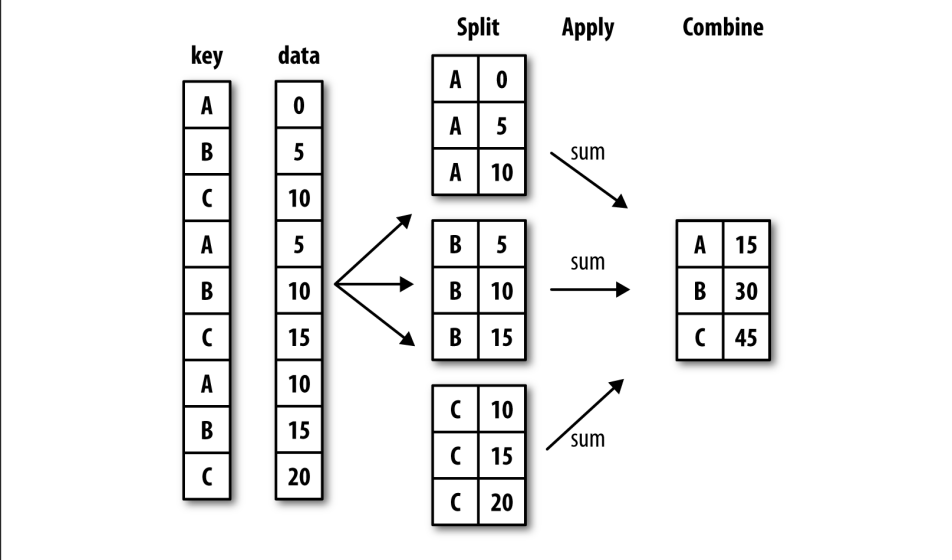

In [66]:
 df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                 'key2' : ['one', 'two', 'one', 'two', 'one'],
                 'data1' : np.random.randn(5),
                 'data2' : np.random.randn(5)})

In [67]:
df

,key1,key2,data1,data2
0,a,one,1.411714,-1.634364
1,a,two,0.604186,-0.447594
2,b,one,0.662465,0.215481
3,b,two,0.136425,-1.163912
4,a,one,-1.515820,-1.408090


In [68]:
 grouped = df['data1'].groupby(df['key1'])

In [69]:
grouped.mean()

key1
a    0.166693
b    0.399445
Name: data1, dtype: float64

In [70]:
grouped.sum()

key1
a    0.50008
b    0.79889
Name: data1, dtype: float64

In [71]:
 means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [72]:
means

key1  key2
a     one    -0.052053
      two     0.604186
b     one     0.662465
      two     0.136425
Name: data1, dtype: float64

In [73]:
means.unstack()
    

key2,one,two
key1,,
a,-0.052053,0.604186
b,0.662465,0.136425


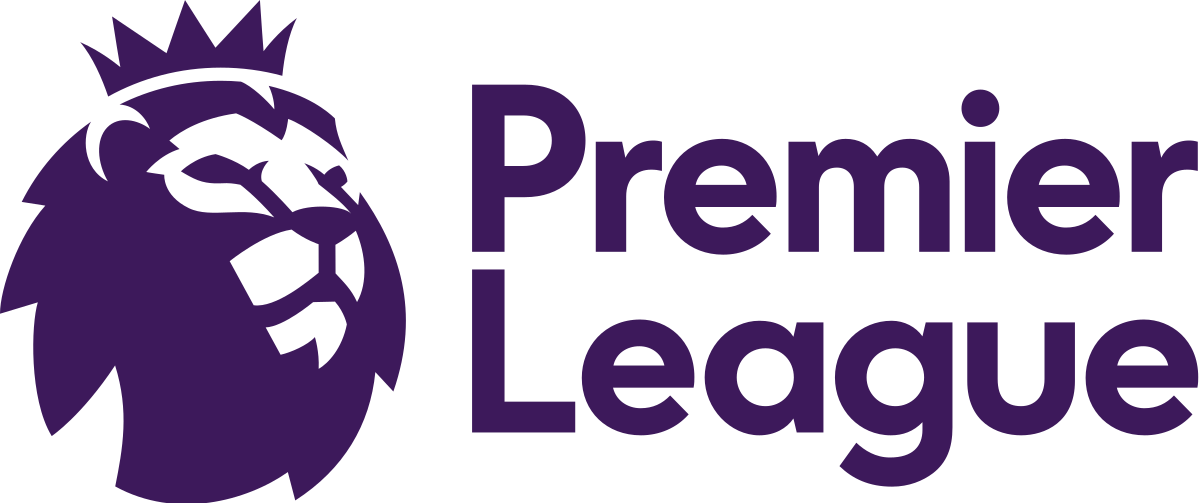

In [74]:
PremierLeague = pd.read_csv('EPL_20_21.csv')

In [75]:
PremierLeague.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [76]:
PremierLeague.groupby(PremierLeague['Club']).Age.mean().round(1).sort_values()

Club
Manchester United          23.9
Southampton                24.1
Aston Villa                24.3
Wolverhampton Wanderers    24.4
Brighton                   24.6
Sheffield United           24.8
Fulham                     25.0
Arsenal                    25.0
Leeds United               25.3
Everton                    25.4
Liverpool FC               25.6
Chelsea                    25.6
Tottenham Hotspur          25.6
Leicester City             25.6
Manchester City            25.7
Newcastle United           26.1
West Bromwich Albion       26.8
Burnley                    27.0
West Ham United            27.5
Crystal Palace             28.3
Name: Age, dtype: float64

In [77]:
PremierLeague.groupby(PremierLeague['Club']).Goals.sum().sort_values(ascending=False)

Club
Manchester City            82
Manchester United          70
Tottenham Hotspur          66
Liverpool FC               65
Leicester City             64
Leeds United               60
West Ham United            60
Chelsea                    56
Arsenal                    53
Aston Villa                52
Southampton                47
Everton                    45
Newcastle United           44
Crystal Palace             39
Brighton                   39
Wolverhampton Wanderers    34
West Bromwich Albion       33
Burnley                    32
Fulham                     26
Sheffield United           19
Name: Goals, dtype: int64

In [78]:
PremierLeague.groupby(['Club']).Red_Cards.sum().sort_values(ascending=False)

Club
Brighton                   6
Arsenal                    5
West Bromwich Albion       4
Aston Villa                4
Sheffield United           3
West Ham United            3
Chelsea                    3
Fulham                     3
Southampton                3
Newcastle United           3
Crystal Palace             2
Everton                    2
Tottenham Hotspur          2
Manchester City            2
Wolverhampton Wanderers    1
Manchester United          1
Leeds United               1
Leicester City             0
Burnley                    0
Liverpool FC               0
Name: Red_Cards, dtype: int64

In [79]:
PremierLeague['IS_ENG'] = PremierLeague['Nationality'] == 'ENG'

In [80]:
PremierLeague.groupby(['Club', 'IS_ENG']).Goals.sum().unstack()

IS_ENG,False,True
Club,,
Arsenal,44,9
Aston Villa,23,29
Brighton,22,17
Burnley,19,13
Chelsea,38,18
Crystal Palace,31,8
Everton,25,20
Fulham,19,7
Leeds United,34,26


## Data Aggregation

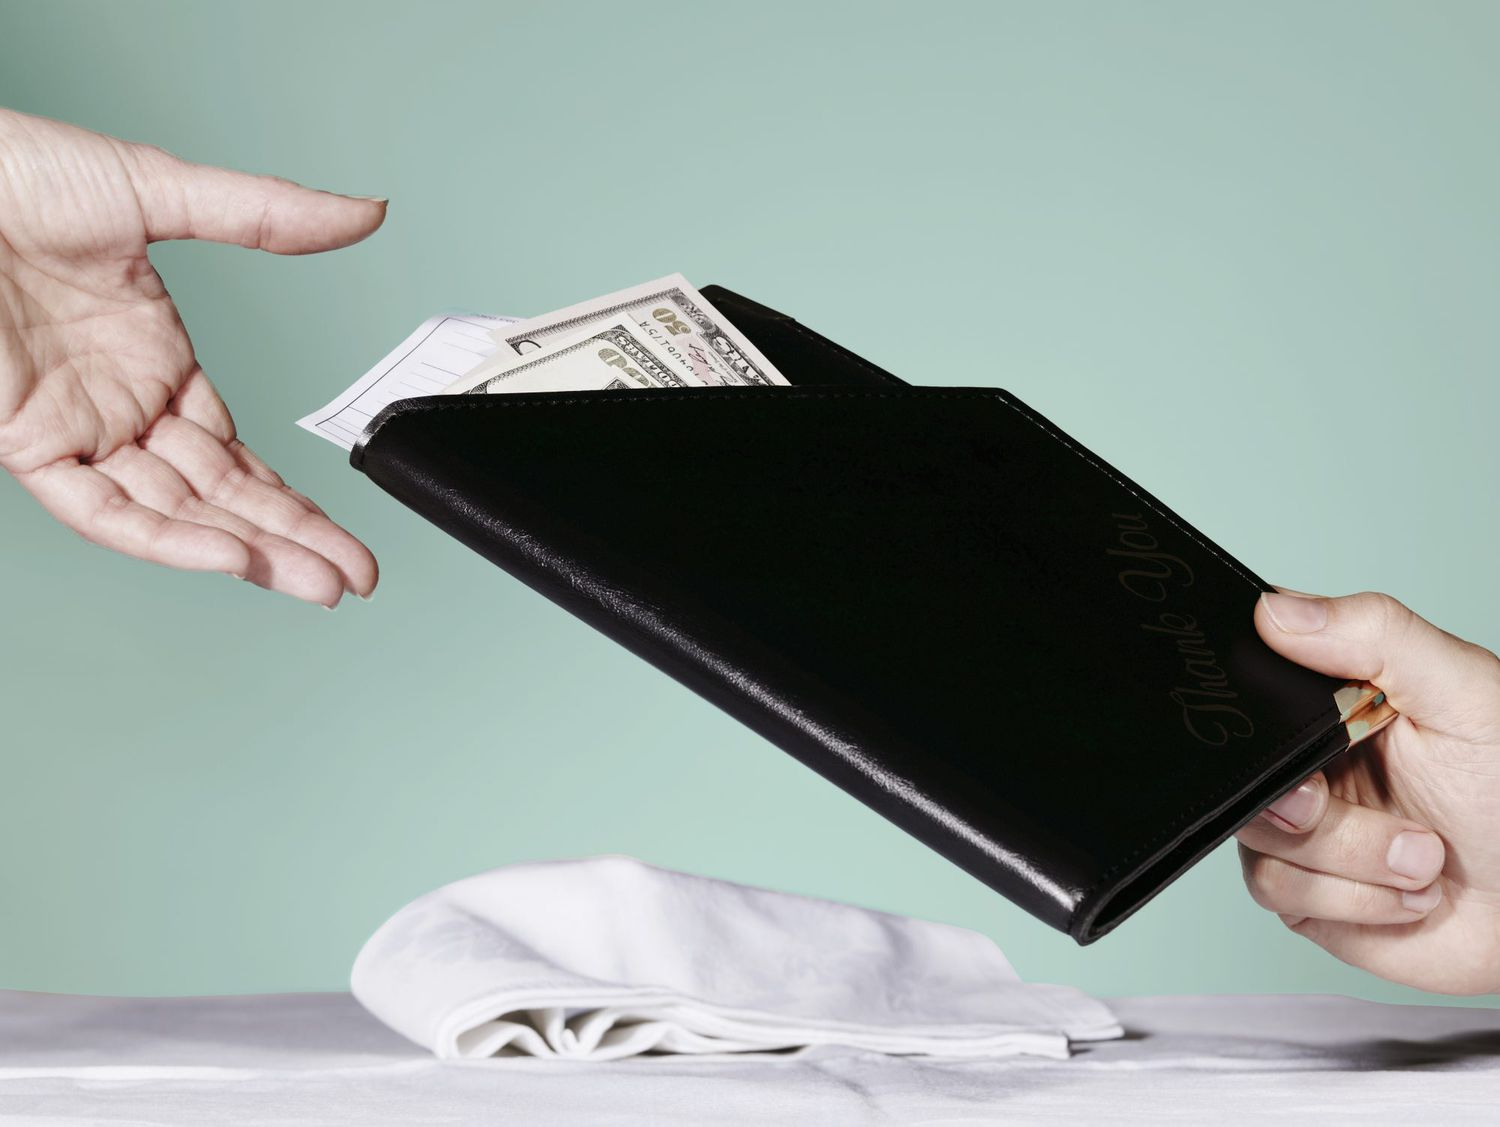

In [83]:
tips = pd.read_csv('tips.csv')

In [84]:
 tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [89]:
 tips[:6]

,total_bill,tip,gender,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


In [ ]:
tips['']

## Column-wise and Multiple Function Application

In [90]:
 grouped = tips.groupby(['gender', 'smoker'])

In [92]:
grouped.head()

,total_bill,tip,gender,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
11,35.26,5.00,Female,No,Sun,Dinner,4,0.141804
14,14.83,3.02,Female,No,Sun,Dinner,2,0.203641
16,10.33,1.67,Female,No,Sun,Dinner,3,0.161665


In [87]:
 grouped_pct = grouped['tip_pct']

In [88]:
 grouped_pct.agg('mean')

gender  smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [93]:
 grouped_pct.agg(['mean', 'std'])

mean       std
gender smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [94]:
 tips.groupby(['gender', 'smoker'], as_index=False).mean()

,gender,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


## Apply function

In [95]:
extra_bill = lambda x: x + x * 0.14

In [96]:
# def extra_bill(x):
   # return x + x * 0.14

In [97]:
tips['extra_bill'] = tips['total_bill'].apply(extra_bill)

In [98]:
tips.head()

,total_bill,tip,gender,smoker,day,time,size,tip_pct,extra_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,19.3686
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,11.7876
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,23.9514
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,26.9952
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,28.0326


# Time Series

## Date and Time Data Types and Tools

In [99]:
from datetime import datetime

In [100]:
now = datetime.now()

In [101]:
now

datetime.datetime(2023, 3, 17, 18, 26, 12, 704860)

In [102]:
now.year, now.month, now.day

(2023, 3, 17)

In [103]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [104]:
delta

datetime.timedelta(days=926, seconds=56700)

In [105]:
delta.days

926

In [106]:
delta.seconds

56700

## Converting between string and datetime

In [108]:
stamp = datetime(2011, 1, 3)

In [109]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [110]:
str(stamp)

'2011-01-03 00:00:00'

In [111]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [112]:
value = '2011-01-03'

In [113]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

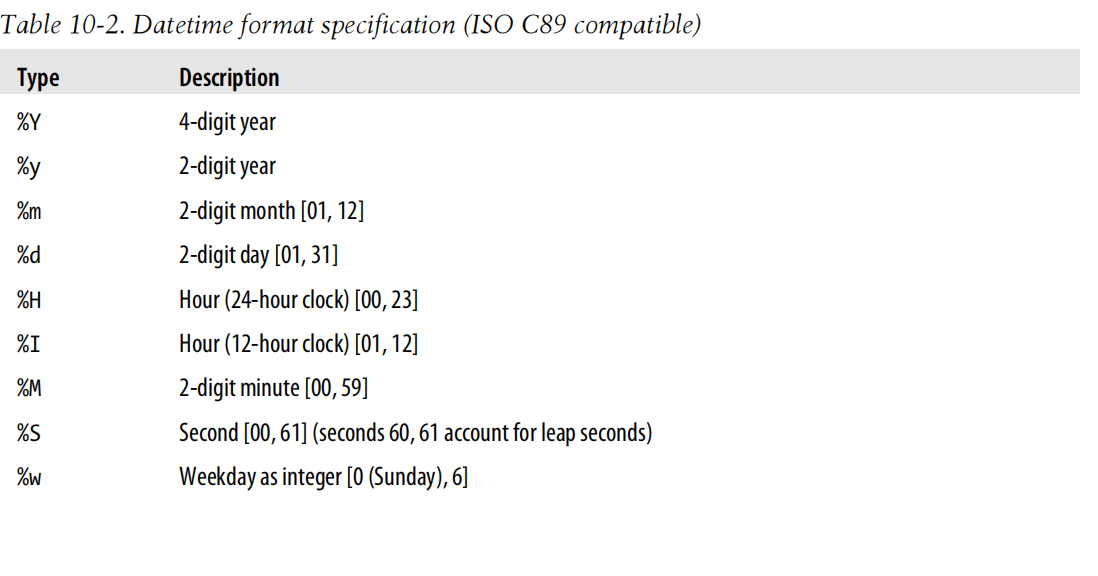

In [114]:
from dateutil.parser import parse

In [115]:
 parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [116]:
 parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [117]:
datestrs = ['7/6/2011', '8/6/2011']

In [118]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [119]:
 dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
          datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [120]:
ts = Series(np.random.randn(6), index=dates)

In [122]:
type(ts)

pandas.core.series.Series

In [123]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [124]:
taxi = pd.read_csv('taxi_tripdata.csv', low_memory = False)

In [125]:
taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [126]:
taxi['lpep_pickup_datetime'] = pd.to_datetime(taxi['lpep_pickup_datetime'])

In [127]:
taxi['lpep_dropoff_datetime'] = pd.to_datetime(taxi['lpep_dropoff_datetime'])

In [128]:
taxi['lpep_dropoff_datetime']

0       2021-07-01 00:35:36
1       2021-07-01 01:01:31
2       2021-07-01 00:12:00
3       2021-07-01 00:47:23
4       2021-07-01 00:58:46
                ...        
83686   2021-07-02 08:33:00
83687   2021-07-02 07:18:00
83688   2021-07-02 08:15:00
83689   2021-07-02 08:30:00
83690   2021-07-02 07:26:00
Name: lpep_dropoff_datetime, Length: 83691, dtype: datetime64[ns]

In [ ]:
taxi['lpep_pickup_datetime'].head()

In [ ]:
taxi.head()

In [129]:
my_func = (lambda x: x.total_seconds()/60)

In [130]:
taxi['time_diff'] = (taxi['lpep_dropoff_datetime'] - taxi['lpep_pickup_datetime']).apply(my_func)

In [131]:
taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,time_diff
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,...,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0,4.733333
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,...,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0,35.916667
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,...,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0,6.033333
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,...,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0,5.716667
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,...,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0,7.233333


In [132]:
(taxi['time_diff']/60).round(2).sort_values(ascending=False)

9588     23.98
49322    23.98
17545    23.98
27911    23.96
50402    23.95
         ...  
39519     0.00
25859     0.00
39515     0.00
14349     0.00
19197     0.00
Name: time_diff, Length: 83691, dtype: float64

## Indexing, Selection, Subsetting

In [121]:
ts

2011-01-02    0.434415
2011-01-05    0.026550
2011-01-07    1.261177
2011-01-08    1.108455
2011-01-10    0.385862
2011-01-12   -1.069735
dtype: float64

In [135]:
stamp = ts.index[2]

In [136]:
stamp

Timestamp('2011-01-07 00:00:00')

In [137]:
ts[stamp]

1.2611765461873197

In [138]:
ts['1/10/2011']

0.38586166038645514

In [139]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))

In [140]:
longer_ts

2000-01-01   -0.709477
2000-01-02   -2.696018
2000-01-03   -1.091014
2000-01-04    0.274028
2000-01-05    0.469541
                ...   
2002-09-22    0.010154
2002-09-23   -0.099940
2002-09-24   -1.747443
2002-09-25    2.041049
2002-09-26   -0.692781
Freq: D, Length: 1000, dtype: float64

In [141]:
longer_ts['2001']

2001-01-01   -1.527556
2001-01-02   -1.233291
2001-01-03    0.315719
2001-01-04   -0.033694
2001-01-05    0.094395
                ...   
2001-12-27    0.274806
2001-12-28    1.676977
2001-12-29   -0.899702
2001-12-30   -0.384130
2001-12-31   -1.156786
Freq: D, Length: 365, dtype: float64

In [142]:
longer_ts['2001-05']

2001-05-01   -1.069282
2001-05-02    0.025805
2001-05-03   -0.197393
2001-05-04   -1.419194
2001-05-05    0.953803
2001-05-06   -2.031321
2001-05-07    0.317711
2001-05-08   -1.958779
2001-05-09    0.662917
2001-05-10    0.559659
2001-05-11   -0.703489
2001-05-12    1.291025
2001-05-13   -0.985725
2001-05-14   -0.181197
2001-05-15    0.964233
2001-05-16   -2.738648
2001-05-17    1.146162
2001-05-18    0.604629
2001-05-19   -0.803284
2001-05-20   -0.188788
2001-05-21   -0.572464
2001-05-22    0.607771
2001-05-23    0.183635
2001-05-24   -0.821724
2001-05-25   -1.540871
2001-05-26    0.216579
2001-05-27   -0.094895
2001-05-28    0.703258
2001-05-29    1.287894
2001-05-30   -0.364371
2001-05-31   -2.326298
Freq: D, dtype: float64

In [143]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.261177
2011-01-08    1.108455
2011-01-10    0.385862
2011-01-12   -1.069735
dtype: float64

In [144]:
 ts['1/6/2011':'1/11/2011']

2011-01-07    1.261177
2011-01-08    1.108455
2011-01-10    0.385862
dtype: float64

# Date Ranges, Frequencies, and Shifting

## Generating Date Ranges

In [145]:
index = pd.date_range('4/1/2012', '6/1/2012')

In [146]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [147]:
 pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [148]:
 pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

In [149]:
 pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [150]:
 pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

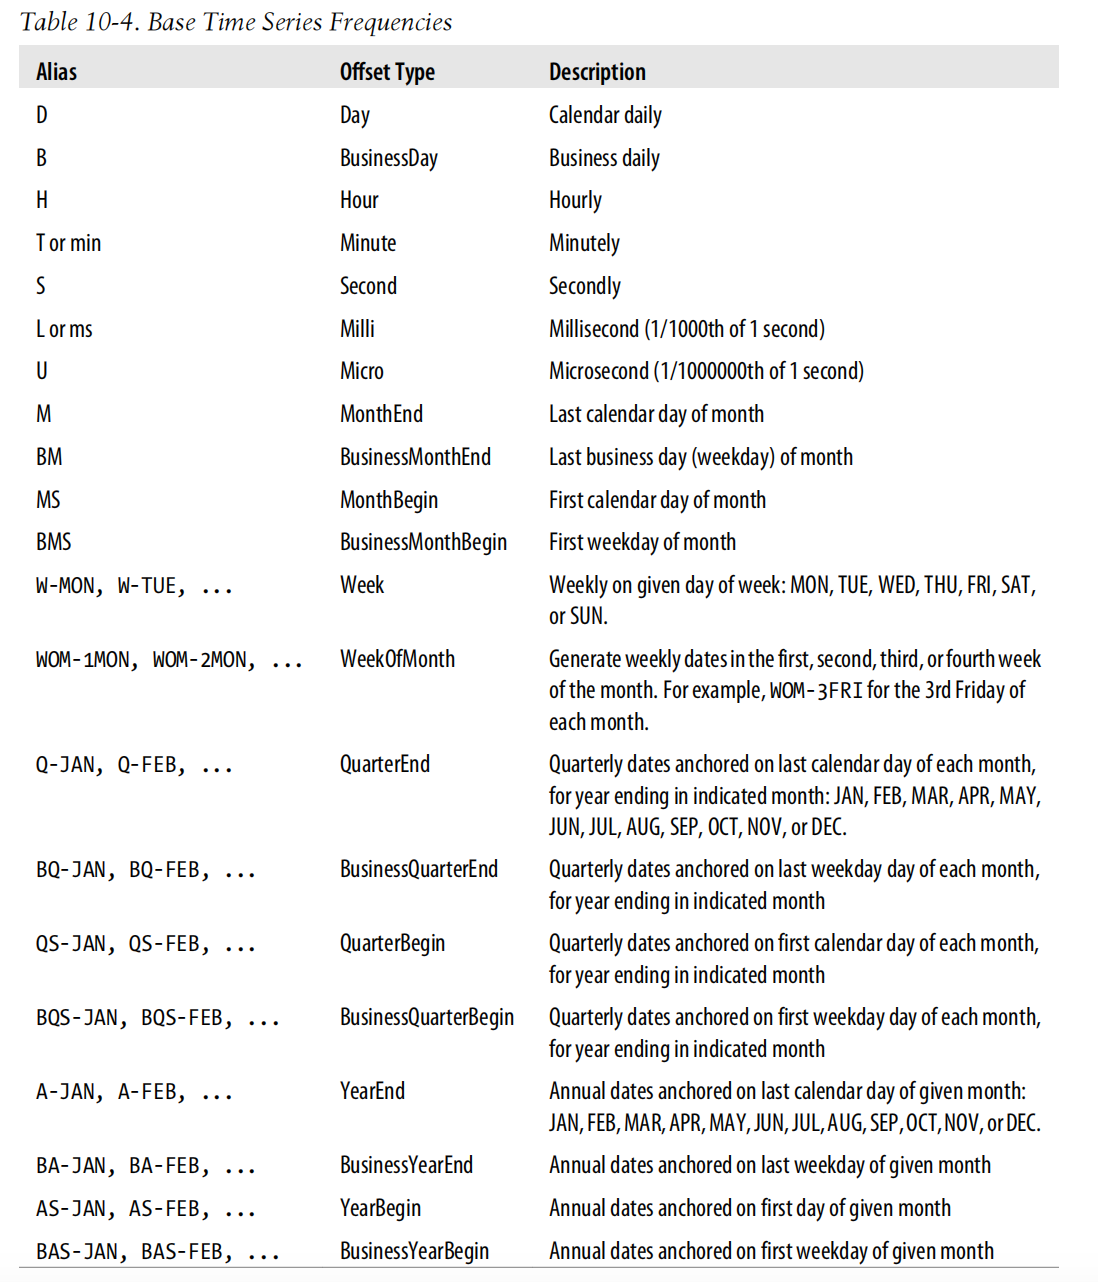

In [151]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')

In [152]:
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shifting (Leading and Lagging) Data

In [153]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [154]:
ts

2000-01-31   -0.211951
2000-02-29    0.310624
2000-03-31   -1.560341
2000-04-30   -0.784683
Freq: M, dtype: float64

In [155]:
ts.shift(2, freq='M')

2000-03-31   -0.211951
2000-04-30    0.310624
2000-05-31   -1.560341
2000-06-30   -0.784683
Freq: M, dtype: float64

In [ ]:
ts.shift(-2, freq='M')